# Optimization Techniques

### Problem Statement

A car company produces 8 models. Long-term projections indicate an expected demand of each car each day, hence a minimum number should be done each day . Because of limitations on production capacity, there is constraint on max number of cars that can bemade daily. To satisfy a shipping contract, a total of at least 10000 cars much be shippedeach day. If each model A car sold results in loss/profit, how many of each type should bemade daily to maximize net profits?
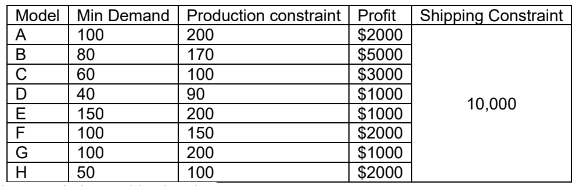






Installing the required package

In [35]:
!pip install pulp



Understanding the problem:
* Let x1 be the number of Model A cars produced daily.
* Let x2 be the number of Model B cars produced daily.
* Let x3 be the number of Model C cars produced daily.
* Let x4 be the number of Model D cars produced daily.
* Let x5 be the number of Model E cars produced daily.
* Let x6 be the number of Model F cars produced daily.
* Let x7 be the number of Model G cars produced daily.
* Let x8 be the number of Model H cars produced daily.

Formulating the objective function and constraints:

##### Objective Function: 
Maximize Z = 2000x1 + 5000x2 + 3000x3 + 1000x4 + 1000x5 + 2000x6 + 1000x7 + 2000x8 

##### Constraints:

Shipping: x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 <= 10000

Production: x1>100 , x2>80 , x3>60 ,x4>40 x5>150 , x6>100 , x7>100 , x8>50

Demand: x1<200 , x2<170 , x3<100 , x4<90 , x5<200 , x6<150 , x7<200 , x8<100

##### Non negative restriction:

x1, x2, x3,x4, x5, x6, x7, x8 >= 0

Initializing the model

In [36]:
# Import all classes of PuLP module
from pulp import *

# Create the problem variable to contain the problem data
model = LpProblem("CarCompany", LpMaximize)

Defining the Decision variables

In [37]:
# Creating 8 decision variables

x1 = LpVariable("modelA", 0, None, LpInteger)
x2 = LpVariable("modelB", 0, None, LpInteger) 
x3 = LpVariable("modelC", 0, None, LpInteger)
x4 = LpVariable("modelD", 0, None, LpInteger)
x5 = LpVariable("modelE", 0, None, LpInteger) 
x6 = LpVariable("modelF", 0, None, LpInteger)
x7 = LpVariable("modelG", 0, None, LpInteger)
x8 = LpVariable("modelH", 0, None, LpInteger) 

Defining the Objecting Function

In [38]:
# maximization
model += 2000*x1 + 5000*x2 + 3000*x3 + 1000*x4 + 1000*x5 + 2000*x6 + 1000*x7 + 2000*x8

Defining the Constraints

In [39]:
# Creating the constraints
model += 1*x1 + 1*x2 + 1*x3 + 1*x4 + 1*x5 + 1*x6 + 1*x7 + 1*x8 >= 10000, "Shipping"

model += x1>=100 ,"Demand1"
model += x2>=80 ,"Demand2"
model += x3>=60 ,"Demand3"
model += x4>=40 ,"Demand4"
model += x5>=150,"Demand5"
model += x6>=100 ,"Demand6"
model += x7>=100 ,"Demand7"
model += x8>=50 ,"Demand8"

model += x1<=200 ,"Production1"
model += x2<=170 ,"Production2"
model += x3<=100 ,"Production3"
model += x4<=90 ,"Production4"
model += x5<=200 ,"Production5"
model += x6<=150 ,"Production6"
model += x7<=200 ,"Production7"
model += x8<=100 ,"Production8"


In [40]:
model

CarCompany:
MAXIMIZE
2000*modelA + 5000*modelB + 3000*modelC + 1000*modelD + 1000*modelE + 2000*modelF + 1000*modelG + 2000*modelH + 0
SUBJECT TO
Shipping: modelA + modelB + modelC + modelD + modelE + modelF + modelG
 + modelH >= 10000

Demand1: modelA >= 100

Demand2: modelB >= 80

Demand3: modelC >= 60

Demand4: modelD >= 40

Demand5: modelE >= 150

Demand6: modelF >= 100

Demand7: modelG >= 100

Demand8: modelH >= 50

Production1: modelA <= 200

Production2: modelB <= 170

Production3: modelC <= 100

Production4: modelD <= 90

Production5: modelE <= 200

Production6: modelF <= 150

Production7: modelG <= 200

Production8: modelH <= 100

VARIABLES
0 <= modelA Integer
0 <= modelB Integer
0 <= modelC Integer
0 <= modelD Integer
0 <= modelE Integer
0 <= modelF Integer
0 <= modelG Integer
0 <= modelH Integer

In [41]:
# The problem is solved using PuLP's choice of Solver
model.solve()

# Each of the variables is printed with it's resolved optimum value
for v in model.variables():
    print(v.name, "=", v.varValue)
print("Max Profit = ",value(model.objective ))

modelA = 200.0
modelB = 170.0
modelC = 100.0
modelD = 90.0
modelE = 200.0
modelF = 150.0
modelG = 200.0
modelH = 100.0
Max Profit =  2540000.0


### Conclusion: 

We can hence say that for 200 units of Model A car sold, 170 units of Model B car sold, 100 units of Model C car sold, 90 units of Model D car sold, 200 units of Model E car sold, 150 units of Model F car sold, 200 units of Model G car sold and 100 units of Model H car sold, the maximum profit that can be obtained is $2540000